# Vaje 2: Linearni napovedni modeli

## Naloga 1: Linearna regresija

1.a: Ustvari podatkovno množico z vsaj desetimi spremenljivkami, na kateri boš testiral pristop. Funkcija ciljne spremenljivke, ki jo definiraš, naj bo numerična, naj vsebuje šum in ima največ 5 spremenljivk.

<details>
  <summary>Namig:</summary>

  *Pomagaj si s [funkcijo numpy.random.random_sample()](https://numpy.org/doc/1.25/reference/random/generated/numpy.random.random_sample.html) in s [funkcijo numpy.random.normal()](https://numpy.org/doc/1.25/reference/random/generated/numpy.random.normal.html)*.
   
</details>

In [1]:
import numpy as np

In [2]:
# Z numpy.random.random() zgeneriramo matriko velikosti 1000x10 (1000 vrstic, 10 stolpcev)
x = np.random.random((1000, 10))
# Definiramo ciljno spremenljivko in ji dodamo normalno porazdeljen šum z numpy.random.normal(pričakovana vrednost, standardna deviacija)
# Z x[:, i] izberemo celoten i-ti stolpec matrike
y = x[:, 0] * x[:, 1] - 3 * x[:, 2] +  6*x[:, 3] - 3 * x[:, 4] * x[:, 3] * x[:, 2] + np.random.normal(0, 0.2, size=1000)
# Definiramo masko, ki nam pove katere katere spremenljivke definirajo ciljno spremenljivko
y_mask = [True, True, True, True, True, False, False, False, False, False]

1.b: Podatke razdeli na učno in testno množico. Razmerje med velikostjo učne in testne množice naj bo 4:1.

In [4]:
# Izberemo prvih (4/5)*1000=800 vrstic, ki bodo sestavljale učno množico
x_train = x[:800, :]
y_train = y[:800]
# Izberemo zadnjih (1/5)*1000=200 vrstic, ki bodo sestavljale testno množico
x_test = x[800:, :]
y_test = y[800:]

1.c: Natreniraj model linearne regresije in oceni njegovo točnost na testni množici z RMSE.

<details>
  <summary>Namig:</summary>

  *Uporabi [napovedni model sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) in [sklearn.metrics.root_mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html)*.

</details>

In [5]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

In [6]:
# Natreniramo napovedni model linearne regresije
lm = LinearRegression().fit(x_train, y_train)

# Napovemo ciljno spremenljivko za testne podatke
y_pred = lm.predict(x_test)

# Izpišemo RMSE modela na testnih podatkih 
print(f"RMSE error on test data: {root_mean_squared_error(y_test, y_pred)}")

RMSE error on test data: 0.3250353644451613


1.d: Odgovori na naslednja vprašanja:
- Kateri koeficienti spremenljivk pozitivno korelirajo s ciljno spremenljivko in kateri negativno?
- Katera spremenljivka najbolj vpliva na napoved modela?
- Kako bi brez klica metode LinearRegression.predict() ugotovil vrednost, ki bi jo model napovedal za vektor ničel?
- Kolikšna je razlika med napako na učni in testni množici?
- Koliko na točnost vplivajo spremenljivke, ki se v ciljni funkciji ne pojavijo?

In [7]:
# Izpišemo koeficiente modela
print(f"Model coefficients: {', '.join([str(coef) for coef in lm.coef_])}")
# Najdemo indekse pozitivnih/negativnih koeficientov in jih izpišemo 
positive_coefs = (lm.coef_ > 0).nonzero()
negative_coefs = (lm.coef_ < 0).nonzero()
print(f"Indices of positive coefficients: {', '.join([str(ind) for ind in positive_coefs[0]])}")
print(f"Indices of negative coefficients: {', '.join([str(ind) for ind in negative_coefs[0]])}")

# Najdemo koeficient z najvišjo absolutno vrednostjo
print(f"Index of the coefficient with the highest absolute value: {np.argmax(np.abs(lm.coef_))}")

# Izpišemo začetno vrednost modela
print(f"Intercept of the model: {lm.intercept_}")

# Napaka na učni množici 
print(f"Error on the train set: {root_mean_squared_error(y_train, lm.predict(x_train))}")
print(f"Error on the test set: {root_mean_squared_error(y_test, y_pred)}")
print(f"Difference between the errors: {np.abs(root_mean_squared_error(y_test, y_pred)-root_mean_squared_error(y_train, lm.predict(x_train)))}")

# Natreniramo model le na spremenljivkah, ki definirajo ciljno funkcij, pri tem si pomagamo z y_mask iz točke 1.a
lm_opt = LinearRegression().fit(x_train[:, y_mask], y_train)
print(f"Error on test data for the model with only relevant features: {root_mean_squared_error(y_test, lm_opt.predict(x_test[:, y_mask]))}")
print(f"Difference in error between the original model and model with only relevant features {np.abs(root_mean_squared_error(y_test, y_pred)-root_mean_squared_error(y_test, lm_opt.predict(x_test[:, y_mask])))}")

Model coefficients: 0.46419727624946205, 0.5289547249461419, -3.7124154386290544, 5.267663879840353, -0.6880239771727504, 0.03773155114162785, 0.00741530931852552, -0.01373158354827786, 0.05619379221610932, 0.08798450719443474
Indices of positive coefficients: 0, 1, 3, 5, 6, 8, 9
Indices of negative coefficients: 2, 4, 7
Index of the coefficient with the highest absolute value: 3
Intercept of the model: 0.38605072954262587
Error on the train set: 0.30953193870362017
Error on the test set: 0.3250353644451613
Difference between the errors: 0.015503425741541121
Error on test data for the model with only relevant features: 0.32251644266754587
Difference in error between the original model and model with only relevant features 0.002518921777615424


Odgovori:
- S ciljno spremenljivko pozitivno korelirajo spremenljivke z indeksi 0, 1, 3, 5, 8; Negativno pa spremenljivke z indeksi 2, 4, 6, 7, 9
- Na ciljno spremenljivko najbolj vpliva koeficient z najvišjo absolutno vrednostjo. V našem primeru je to koeficient za spremenljivko z indeksom 3
- Ko bomo v model dali vektor ničel, bo napoved odvisna le od začetne vrednosti modela. Ta je v našem primeru 0.43614753558081554
- Vidimo, da je napaka na testni množici 0.017694955146782265 višja kot na učni množici
- Vidimo, da je napaka pri modelu, ki uporablja le relevantne spremenljivke za 0.0024299084093188927 nižja

## Naloga 2: Logistična regresija

2.a: Ustvari podatkovno množico z vsaj desetimi spremenljivkami, na kateri boš testiral pristop. Vrednosti ciljne spremenljivke naj bodo diskretne, naj vsebujejo šum in naj bodo definirane z največ 5-imi spremenljivkami.

<details>
  <summary>Namig:</summary>

  *Najprej definiraj funkcijo ciljne spremenljivke, ki bo numerična. Numerične vrednosti nato diskretiziraj.*

</details>

In [8]:
# Z numpy.random.random() zgeneriramo matriko velikosti 1000x10 (1000 vrstic, 10 stolpcev)
x = np.random.random((1000, 10))
# Definiramo numerično ciljno spremenljivko in ji dodamo normalno porazdeljen šum z numpy.random.normal(pričakovana vrednost, standardna deviacija)
# Z x[:, i] izberemo celoten i-ti stolpec matrike
y_continuous = 1 + x[:, 0] * x[:, 1] - 3 * x[:, 2] +  6*x[:, 3] - 3 * x[:, 4] * x[:, 3] * x[:, 2] + np.random.normal(0, 0.2, size=1000)
y_discrete = y_continuous > np.mean(y_continuous)
# Definiramo masko, ki nam pove katere katere spremenljivke definirajo ciljno spremenljivko
y_mask = [True, True, True, True, True, False, False, False, False, False]

2.b: Podatke razdeli na učno in testno množico. Razmerje med velikostjo učne in testne množice naj bo 4:1.

In [9]:
# Izberemo prvih (4/5)*1000=800 vrstic, ki bodo sestavljale učno množico
x_train = x[:800, :]
y_train = y_discrete[:800]
# Izberemo zadnjih (1/5)*1000=200 vrstic, ki bodo sestavljale testno množico
x_test = x[800:, :]
y_test = y_discrete[800:]

2.c: Preveri razmerje med pozitivnimi (True) in negativnimi (False) vrednostmi ciljne spremenljivke znotraj celotne podatkovne množice, znotraj učne množice in znotraj testne množice. Se razmerja skladajo s tvojim pričakovanjem? Zakaj ja/ne?

In [10]:
print(f"Ratio between positive and negative class values in the data set: {np.sum(y_discrete)/(1000-np.sum(y_discrete))}")
print(f"Ratio between positive and negative class values in the training set: {np.sum(y_train)/(800-np.sum(y_train))}")
print(f"Ratio between positive and negative class values in the test set: {np.sum(y_test)/(200-np.sum(y_test))}")

Ratio between positive and negative class values in the data set: 0.8691588785046729
Ratio between positive and negative class values in the training set: 0.8604651162790697
Ratio between positive and negative class values in the test set: 0.9047619047619048


Odgovor: Če ne vzorčimo iz Gaussove distribucije, lahko visoke vrednosti bolj vplivajo na povprečno vrednost kot nizke. Zato bo manj kot pol ciljnih vrednosti pozitivnih. Različna distribucija ciljnih vrednosti lahko vplivajo na točnost modela, saj ponavadi pričakujemo, da sta distribuciji ciljne spremenljivke v učni in testni množici enaki/podobni. 

2.d: Natreniraj model logistične regresije in oceni njegovo točnost na testni množici z metriko accuracy.

<details>
  <summary>Namig:</summary>

  *Uporabi [napovedni model sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) in [sklearn.metrics.accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)*.

</details>

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [12]:
# Natreniramo napovedni model logistične regresije
lm = LogisticRegression().fit(x_train, y_train)

# Napovemo ciljno spremenljivko za testne podatke
y_pred = lm.predict(x_test)

# Izpišemo accuracy modela na testnih podatkih 
print(f"Accuracy on test data: {accuracy_score(y_test, y_pred)}")

Accuracy on test data: 0.93


2.e: Odgovori na naslednja vprašanja:
- Kateri koeficienti spremenljivk pozitivno korelirajo s ciljno spremenljivko in kateri negativno?
- Katera spremenljivka najbolj vpliva na napoved modela?
- Kako bi brez klica metode LinearRegression.predict() ugotovil vrednost, ki bi jo model napovedal za vektor ničel?
- Kolikšna je razlika med napako na učni in testni množici?
- Koliko na točnost vplivajo spremenljivke, ki se v ciljni funkciji ne pojavijo?

In [14]:
# Izpišemo koeficiente modela
print(f"Model coefficients: {', '.join([str(coef) for coef in lm.coef_])}")
# Najdemo indekse pozitivnih/negativnih koeficientov in jih izpišemo 
positive_coefs = (lm.coef_ > 0).nonzero()
negative_coefs = (lm.coef_ < 0).nonzero()
print(f"Indices of positive coefficients: {', '.join([str(ind) for ind in positive_coefs[1]])}")
print(f"Indices of negative coefficients: {', '.join([str(ind) for ind in negative_coefs[1]])}")

# Najdemo koeficient z najvišjo absolutno vrednostjo
print(f"Index of the coefficient with the highest absolute value: {np.argmax(np.abs(lm.coef_))}")

# Izpišemo začetno vrednost modela
print(f"Intercept of the model: {lm.intercept_[0]}")
print(1/(1+np.e**-lm.intercept_[0]))
print(lm.predict(np.zeros((1,10)))[0])

# Napaka na učni množici 
print(f"Accuracy on the train set: {accuracy_score(y_train, lm.predict(x_train))}")
print(f"Accuracy on the test set: {accuracy_score(y_test, y_pred)}")
print(f"Difference in accuracy: {np.abs(accuracy_score(y_test, y_pred)-accuracy_score(y_train, lm.predict(x_train)))}")

# Natreniramo model le na spremenljivkah, ki definirajo ciljno funkcij, pri tem si pomagamo z y_mask iz točke 1.a
lm_opt = LogisticRegression().fit(x_train[:, y_mask], y_train)
print(f"Accuracy on test data for the model with only relevant features: {accuracy_score(y_test, lm_opt.predict(x_test[:, y_mask]))}")
print(f"Difference in accuracy between the original model and model with only relevant features {np.abs(accuracy_score(y_test, y_pred)-accuracy_score(y_test, lm_opt.predict(x_test[:, y_mask])))}")

Model coefficients: [ 0.74823289  0.83645537 -6.00007857  8.41938377 -2.18309633 -0.11268475
  0.16032021  0.2508951  -0.03521361 -0.28193105]
Indices of positive coefficients: 0, 1, 3, 6, 7
Indices of negative coefficients: 2, 4, 5, 8, 9
Index of the coefficient with the highest absolute value: 3
Intercept of the model: -1.3340022849383473
0.20849811095739054
False
Accuracy on the train set: 0.96
Accuracy on the test set: 0.93
Difference in accuracy: 0.029999999999999916
Accuracy on test data for the model with only relevant features: 0.935
Difference in accuracy between the original model and model with only relevant features 0.0050000000000000044


2.f: Natreniraj model linearne regresije in ga primerjaj z modelom logistične regresije. Lahko pri napovedih opaziš kaj nenavadnega?

In [15]:
# Vektor učne ciljne spremenljivke spremenimo v vrednosti 0 (False) in 1 (True)
# Naj bodo na začetku vse vrednosti 0
y_lin_train = np.zeros(y_train.shape)
# Vrednosti, kjer je y_train True nastavimo na 1 (y_train tu deluje kot maska)
y_lin_train[y_train] = 1.0

In [16]:
# Natreniramo model linearne regresije
lin_model = LinearRegression().fit(x_train, y_lin_train)
# Napovemo ciljne vrednosti (numerične)
y_lin_pred = lin_model.predict(x_test)
# Napovedane ciljne vrednosti pretvorimo v True (y>0.5) in False (y<=0.5)
y_pred = y_lin_pred > 0.5

print(f"Accuracy with the linear regression model: {accuracy_score(y_test, y_pred)}")
# Poglejmo maksimalno in minimalno vrednost, ki jo dobimo pri napovedih
print(f"Maximal predicted value: {np.max(y_lin_pred)}. Minimal predicted value: {np.min(y_lin_pred)}")

Accuracy with the linear regression model: 0.93
Maximal predicted value: 1.2773789129561663. Minimal predicted value: -0.4247418663628819


Odgovor: Opazimo lahko, da lahko model napove vrednosti, ki so višje id 1 in nižje od 0. To vpliva interpretabilnost modela, saj ne vemo, kaj pomeni vrednost 1.4 ko napovedujemo diskretno vrednost. 

## Bonus: Primerjava linearnih modelov z modelom k-najbližjih sosedov

B.a: Premisli, kakšen vpliv ima domena/razpon podatkov na linearne modele in kakšnega na model k-najbližjih sosedov.

Odgovor: Domena/razpon podatkov ne vpliva veliko na linearne modele, saj lahko koeficiente in začetno vrednost priredimo, da bo model napovedoval ustrezne vrednosti. Na model k-najbližjih sosedov domena/razpon vpliva, saj vpliva na izračun razdalje med primeri.

B.b: Primerjaj točnost linearne regresije s točnostjo modela k-najbližjih sosedov pri napovedovanju numeričnih spremenljivk. Uporabi kodo iz naloge 1.

In [25]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [26]:
# Z numpy.random.random() zgeneriramo matriko velikosti 1000x10 (1000 vrstic, 10 stolpcev)
x = np.random.random((1000, 10))
# Definiramo ciljno spremenljivko in ji dodamo normalno porazdeljen šum z numpy.random.normal(pričakovana vrednost, standardna deviacija)
# Z x[:, i] izberemo celoten i-ti stolpec matrike
y = x[:, 0] * x[:, 1] - 3 * x[:, 2] +  6*x[:, 3] - 3 * x[:, 4] * x[:, 3] * x[:, 2] + np.random.normal(0, 0.2, size=1000)
# Definiramo masko, ki nam pove katere katere spremenljivke definirajo ciljno spremenljivko
y_mask = [True, True, True, True, True, False, False, False, False, False]

# Izberemo prvih (4/5)*1000=800 vrstic, ki bodo sestavljale učno množico
x_train = x[:800, :]
y_train = y[:800]
# Izberemo zadnjih (1/5)*1000=200 vrstic, ki bodo sestavljale testno množico
x_test = x[800:, :]
y_test = y[800:]

# Natreniramo napovedni model linearne regresije in KNN
lm = LinearRegression().fit(x_train, y_train)
knn = KNeighborsRegressor().fit(x_train, y_train)

# Napovemo ciljno spremenljivko za testne podatke
y_pred_lr = lm.predict(x_test)
y_pred_knn = knn.predict(x_test)

# Izpišemo RMSE modela na testnih podatkih 
print(f"Linear regression RMSE on test data: {root_mean_squared_error(y_test, y_pred_lr)}")
print(f"KNN RMSE on test data: {root_mean_squared_error(y_test, y_pred_knn)}")

Linear regression RMSE on test data: 0.32466047547441285
KNN RMSE on test data: 0.8257041567459986


B.c: Primerjaj točnost logistične regresije s točnostjo modela k-najbližjih sosedov pri napovedovanju diskretnih spremenljivk. Uporabi kodo iz naloge 2.

In [27]:
# Z numpy.random.random() zgeneriramo matriko velikosti 1000x10 (1000 vrstic, 10 stolpcev)
x = np.random.random((1000, 10))
# Definiramo numerično ciljno spremenljivko in ji dodamo normalno porazdeljen šum z numpy.random.normal(pričakovana vrednost, standardna deviacija)
# Z x[:, i] izberemo celoten i-ti stolpec matrike
y_continuous = 1 + x[:, 0] * x[:, 1] - 3 * x[:, 2] +  6*x[:, 3] - 3 * x[:, 4] * x[:, 3] * x[:, 2] + np.random.normal(0, 0.2, size=1000)
y_discrete = y_continuous > np.mean(y_continuous)
# Definiramo masko, ki nam pove katere katere spremenljivke definirajo ciljno spremenljivko
y_mask = [True, True, True, True, True, False, False, False, False, False]

# Izberemo prvih (4/5)*1000=800 vrstic, ki bodo sestavljale učno množico
x_train = x[:800, :]
y_train = y_discrete[:800]
# Izberemo zadnjih (1/5)*1000=200 vrstic, ki bodo sestavljale testno množico
x_test = x[800:, :]
y_test = y_discrete[800:]

# Natreniramo napovedni model logistične regresije in KNN
lm = LogisticRegression().fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_train, y_train)

# Napovemo ciljno spremenljivko za testne podatke
y_pred_lr = lm.predict(x_test)
y_pred_knn = knn.predict(x_test)

# Izpišemo Accuracy modela na testnih podatkih 
print(f"Logistic regression accuracy on test data: {accuracy_score(y_test, y_pred_lr)}")
print(f"KNN accuracy on test data: {accuracy_score(y_test, y_pred_knn)}")

Logistic regression accuracy on test data: 0.945
KNN accuracy on test data: 0.865


B.d: Najdi omejitev, ki se pojavi pri linearni regresiji in se ne pojavi pri modelu k-najbližjih sosedov in omejitev, ki se pojavi pri modelu k-najbližjih sosedov in se ne pojavi pri linearni regresiji.

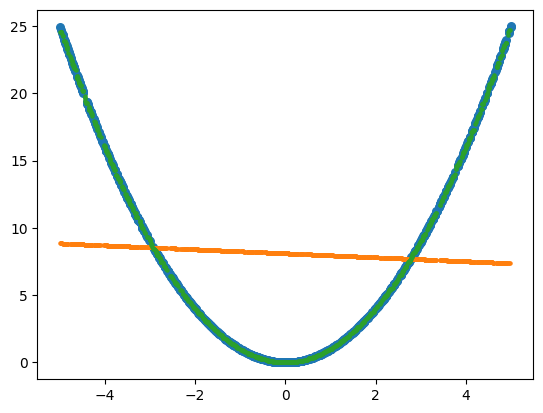

In [23]:
# Naključno vzorčimo točke iz domene [-5, 5]. Vzorce iz [0, 1] pomnožimo tako da jih pomnožimo z 10 in potem premaknemo z -5 
x = np.random.random(size=1000) * 10 - 5
# Definiramo ciljno spremenljivko
y = x ** 2
# Natreniramo modela linearne regresije in k-najbližjih sosedov. Naš x je 1D, metoda fit pa pričakuje 2D matriko. Naš x pretvorimo v 2D z x[:, None] (mu dodamo navidezno dimenzijo)
linear_regression_model = LinearRegression().fit(x[:, None], y)
knn_model = KNeighborsRegressor(n_neighbors=5).fit(x[:, None], y)

# Naključno vzorčimo testne podatke iz domene [-5, 5]
x_test = np.random.random(size=1000) * 10 - 5
# Napovemo vrednosti z obema modeloma
y_lr = linear_regression_model.predict(x_test[:, None])
y_knn = knn_model.predict(x_test[:, None])

# Vizualiziramo vse tri krivulje (y in napovedane vrednosti) z funkcijo plt.scatter(). Parameter s definira velikost točk na grafu
plt.scatter(x=x, y=y, s=30)
plt.scatter(x=x_test, y=y_lr, s=5)
plt.scatter(x=x_test, y=y_knn, s=5)
# Pokažemo graf
plt.show()

Odgovor: Na sliki lahko vidimo primer, ko je ciljna spremenljivka definirana s funkcijo x^2 (modra krivulja). Linearni model (oranžna krivulja) bo slabo napovedal tako ciljno spremenljivko, saj ta ni linearna. Nasprotno, model k-najbližjih (zelena krivulja) bo vrednost napovedal glede na najbližje primere v učni množici in zato vrednost ciljne spremenljivke dobro napovedal.

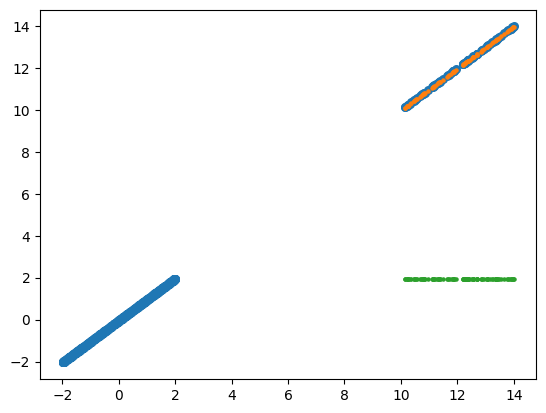

In [24]:
# Naključno vzorčimo podatke iz domene [-2, 2]
x = np.random.random(size=1000) * 4 - 2
# Definiramo ciljno spremenljivko kot x + šum
y = x + np.random.normal(0, 0.2)
# Natreniramo modela
linear_regression_model = LinearRegression().fit(x[:, None], y)
knn_model = KNeighborsRegressor(n_neighbors=5).fit(x[:, None], y)

# Naključno vzorčimo testne podatke iz domene [10, 14] in izračunamo ciljne vrednosti
x_test = np.random.random(size=100) * 4 + 10
y_test = x_test + np.random.normal(0, 0.2)
# Napovemo ciljne vrednosti
y_lr = linear_regression_model.predict(x_test[:, None])
y_knn = knn_model.predict(x_test[:, None])

# Konkateniramo (združimo) učne in testne podatke
x = np.concatenate([x, x_test])
y = np.concatenate([y, y_test])

# Vizualiziramo učne, testne podatke in napovedi obeh modelov
plt.scatter(x=x, y=y, s=30)
plt.scatter(x=x_test, y=y_lr, s=5)
plt.scatter(x=x_test, y=y_knn, s=5)
plt.show()

Odgovor: Na sliki lahko vidimo primer, ko je ciljna spremenljivka definirana s funkcijo x + šum (modra krivulja). Domena učne množice je [-2, 2], domena testne množice pa [10, 14]. Vidimo lahko da bo model linearne regresije (oranžna krivulja) vrednosti dobro napovedal, model k-najbližjih sosedov (zelena krivulja) pa slabo. Razlog za slabe napovedi modela k-najbližjih sosedov je, da je napoved sestavljena kot povprečje najbližjih sosedov, ki so iz druge domene.